# Week 2

## t-test for single mean

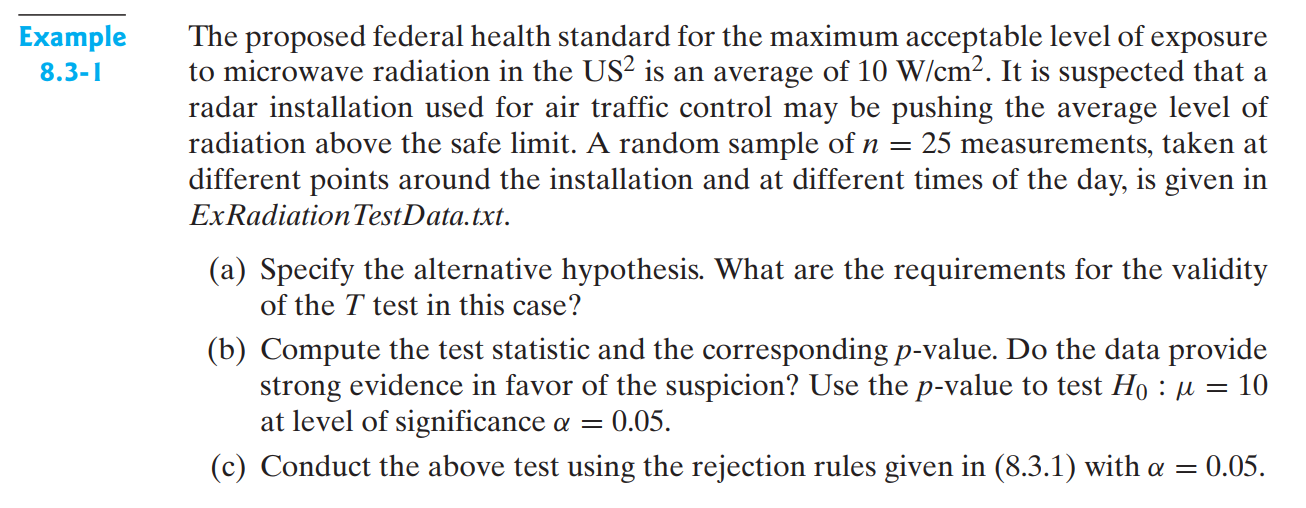

In [ ]:
import pandas as pd

# URL of the text file
url = "https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/ExRadiationTestData.txt"


df = pd.read_csv(url, delim_whitespace=True)

df

<ipython-input-1-659f4cb66c13>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


,x
0,11.53
1,9.52
2,13.65
3,11.81
4,9.45
5,12.77
6,9.36
7,11.14
8,7.04
9,11.26


In [ ]:
df.describe()

,x
count,25.000000
mean,10.599200
std,2.000616
min,7.040000
25%,9.360000
50%,10.590000
75%,11.650000
max,15.390000


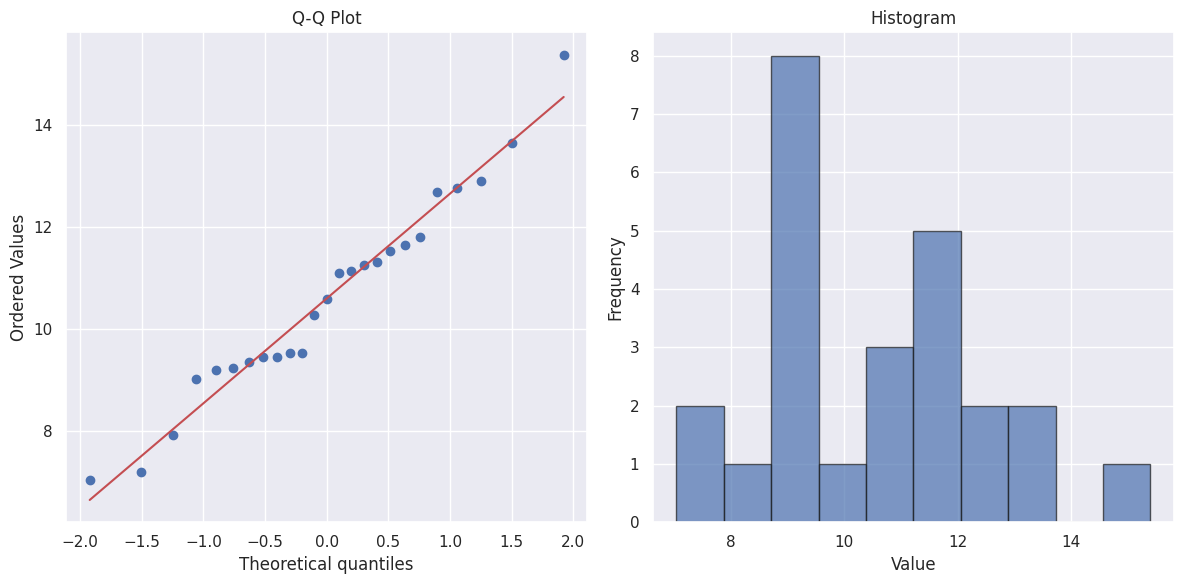

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

# Example: Generate random data for demonstration
# Replace this with your dataset
data = df['x'].values

# Q-Q Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for the Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

# Histogram
plt.subplot(1, 2, 2)  # Create a subplot for the histogram
plt.hist(data, bins=10, edgecolor='k', alpha=0.7)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# test statistic:
(10.6-10)/(2/(25)**0.5)

1.4999999999999991

In [ ]:
import scipy.stats as stats

# Load data from the 'x' column of the DataFrame
data = df['x'].values  # Extract data as a NumPy array

# Compute the sample statistics
n = len(data)  # Sample size
sample_mean = data.mean()  # Sample mean
sample_std = data.std(ddof=1)  # Sample standard deviation (unbiased)

# Define the population mean for the null hypothesis
pop_mean = 10

# Compute the test statistic (t)
t_statistic = (sample_mean - pop_mean) / (sample_std / (n ** 0.5))

# Compute the one-tailed p-value directly
# Use survival function (sf) for the upper tail (Ha: mu > 10)
p_value_one_tailed = stats.t.sf(t_statistic, df=n-1)

# Print the results
print(f"Test Statistic (t): {t_statistic}")
print(f"One-tailed p-value: {p_value_one_tailed}")

Test Statistic (t): 1.4975384548959607
One-tailed p-value: 0.07364542480687267


In [ ]:
import scipy.stats as stats

# Load data from the 'x' column of the DataFrame
data = df['x'].values  # Extract data as a NumPy array

# Perform a one-sample t-test
t_statistic, p_value_two_tailed = stats.ttest_1samp(data, popmean=10)

# Adjust for one-tailed test (Ha: mu > 10)
if t_statistic > 0:  # Check if the test statistic aligns with Ha
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1  # If t_statistic <= 0, the p-value for Ha: mu > 10 is 1

# Print the results
print(f"Test Statistic (t): {t_statistic}")
print(f"One-tailed p-value: {p_value_one_tailed}")

Test Statistic (t): 1.4975384548959607
One-tailed p-value: 0.07364542480687267


## z-test for proportions

## Binomial convertges to Normal?

15.0
285.0


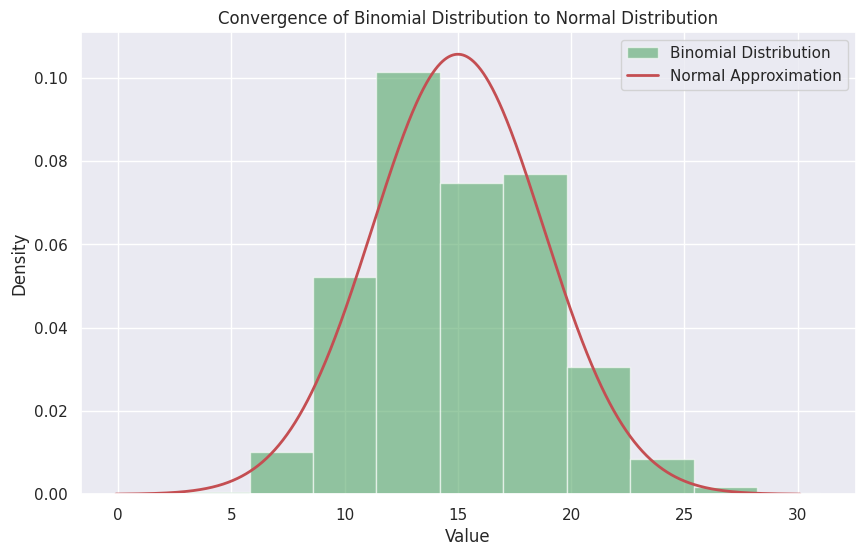

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n = 300  # number of trials
p = 0.05  # probability of success
q = 1-p
size = 10000  # number of simulations
print(n*p)
print(n*q)

# Binomial distribution
binomial_data = np.random.binomial(n, p, size)

# Mean and standard deviation of the binomial distribution
binomial_mean = n * p
binomial_std = np.sqrt(n * p * (1 - p))

# Generate the normal distribution with the same mean and standard deviation
x = np.linspace(binomial_mean - 4*binomial_std, binomial_mean + 4*binomial_std, 1000)
normal_pdf = norm.pdf(x, binomial_mean, binomial_std)

# Plot the histogram of the binomial distribution and the normal approximation
plt.figure(figsize=(10, 6))
plt.hist(binomial_data, bins=10, density=True, alpha=0.6, color='g', label='Binomial Distribution')
plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal Approximation')
plt.title('Convergence of Binomial Distribution to Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

It is thought that more than 70% of all faults in transmission lines are caused by lightning. In a random sample of 200 faults from a large data base, 151 are due to lightning. Does the data provide strong evidence in support of this contention? Test at level of significance α = 0.01, and report the p-value.

In [ ]:
import scipy.stats as stats
import numpy as np

# Given data
n = 200  # Sample size
x = 151  # Number of faults due to lightning
p0 = 0.70  # Null hypothesis proportion
alpha = 0.01  # Level of significance

# Sample proportion
p_hat = x / n

# Compute the z-statistic
z_stat = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)

# Compute the one-tailed p-value (Ha: p > 0.70)
p_value = stats.norm.sf(z_stat)

# Print results
print(f"Sample Proportion (p̂): {p_hat:.4f}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is strong evidence that more than 70% of faults are caused by lightning.")
else:
    print(f"Fail to reject the null hypothesis at level of significance 0.01: There is insufficient evidence to support that more than 70% of faults are caused by lightning.")

Sample Proportion (p̂): 0.7550
Z-Statistic: 1.6973
One-tailed p-value: 0.0448
Fail to reject the null hypothesis at level of significance 0.01: There is insufficient evidence to support that more than 70% of faults are caused by lightning.


In [ ]:
import scipy.stats as stats

# Significance level
alpha = 0.01

# Critical z-values
z_critical = stats.norm.ppf(1-alpha)  # Lower critical value (two-tailed)
z_critical

2.3263478740408408

## Regression parameters

In [ ]:
import pandas as pd

# URL of the text file
url = "https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/OxygenTempData.txt"


df = pd.read_csv(url, delim_whitespace=True)
df.head()

<ipython-input-15-0c6b3dd2a9f0>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


,T,DO
0,9.3,8.5
1,9.0,9.7
2,13.5,10.4
3,13.5,7.4
4,14.6,8.3


In [ ]:
df.describe()

,T,DO
count,59.000000,59.000000
mean,10.716949,9.103390
std,3.984286,1.738506
min,2.700000,4.200000
25%,7.750000,8.150000
50%,10.500000,9.100000
75%,13.600000,10.400000
max,18.500000,12.700000


In [ ]:
df.corr()

,T,DO
T,1.000000,-0.708212
DO,-0.708212,1.000000


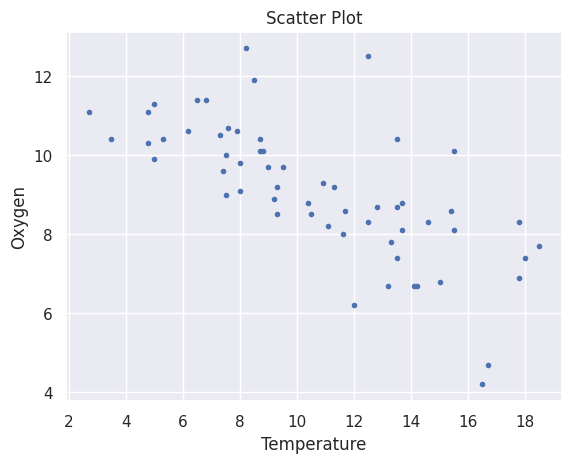

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

# Example: Generate random data for demonstration
# Replace this with your dataset
X = df['T']
Y = df['DO']
# Q-Q Plot
plt.plot(X, Y, '.')
plt.title("Scatter Plot")
plt.xlabel("Temperature")
plt.ylabel("Oxygen")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Add a constant to predictor (for the intercept)
x = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, x).fit()
Extract residuals
residuals = model.resid

# Create a Q-Q plot
sm.graphics.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

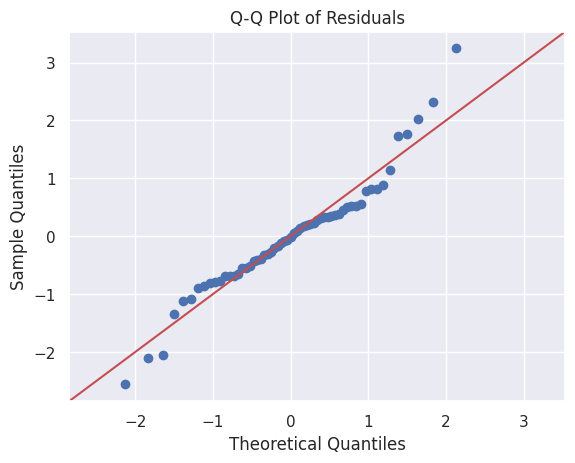

In [ ]:
# Extract residuals
residuals = model.resid

# Create a Q-Q plot
sm.graphics.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

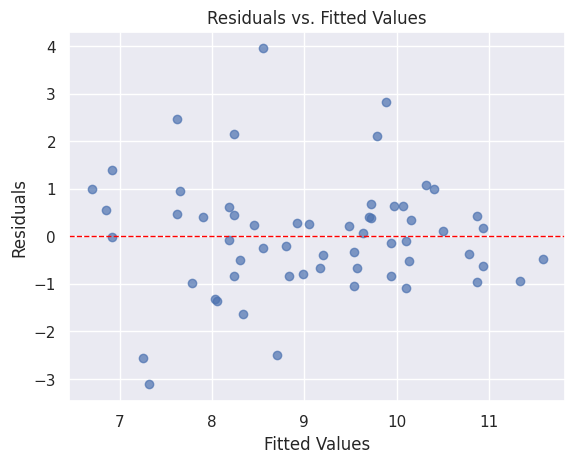

In [ ]:
# To check for homoscedasticity (constant variance of residuals).
# If the residuals are randomly scattered around zero without a clear pattern, it suggests homoscedasticity.
# Extract fitted values and residuals
fitted = model.fittedvalues
residuals = model.resid

# Residuals vs. Fitted Values plot
plt.scatter(fitted, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     DO   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     57.36
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           3.52e-10
Time:                        14:02:16   Log-Likelihood:                -95.301
No. Observations:                  59   AIC:                             194.6
Df Residuals:                      57   BIC:                             198.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4152      0.466     26.639      0.0

## test for median
Elevated blood pressure among infants is thought to be a risk factor for hypertensive disease later in life.4 However, because blood pressure is rarely measured on
children under the age of three, there is little understanding of what blood pressure
levels should be considered elevated. Systolic blood pressure (SBP) measurements
from a sample of 36 infants can be found in InfantSBP.txt. Do the data suggest that
the median is greater than 94? Test at α = 0.05 and report the p-value.

In [ ]:
#Systolic blood pressure (SBP) measurements from a sample of 36 infants
url = "https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/InfantSBP.txt"
df = pd.read_csv(url, delim_whitespace=True)
df.head()

<ipython-input-26-7cd9078ca990>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


,SBP
0,120.1
1,80.1
2,98.2
3,106.1
4,117.4


In [ ]:
data = df['SBP'].values
sum(data > 94)

22

In [ ]:
import numpy as np
from scipy.stats import norm

# Load the data (assuming 'InfantSBP.txt' contains one column of SBP measurements)
data = df['SBP'].values

# Set the threshold for the median
mu0 = 94

# Count the number of measurements greater than 94
Y = np.sum(data > mu0)
n = len(data)

# Calculate p (the proportion of observations greater than 94)
p = Y / n

# Calculate the standard error of p under the null hypothesis (p = 0.5)
se = np.sqrt(0.5 * 0.5 / n)

# Calculate the z-statistic
z = (p - 0.5) / se

# Compute the p-value based on the alternative hypothesis (µ > µ0)
# For Ha: µ > µ0, we look for the area to the right of the z-statistic
p_value = 1 - norm.cdf(z)

# Print the results
print(f"Number of positive signs (SBP > 94): {Y}")
print(f"p-value: {p_value}")

# Check if we reject the null hypothesis at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The median is greater than 94.")
else:
    print("Fail to reject the null hypothesis: The median is not greater than 94.")

Number of positive signs (SBP > 94): 22
p-value: 0.09121121972586776
Fail to reject the null hypothesis: The median is not greater than 94.


## $\chi^2$ test for a normal variance

In [ ]:
import numpy as np
from scipy.stats import chi2

# Given values
n = 20  # sample size
S = 0.01095  # sample standard deviation
sigma_0 = 0.015  # hypothesized population standard deviation
alpha = 0.05  # significance level

# Test statistic
sigma_0_squared = sigma_0 ** 2
S_squared = S ** 2
chi_squared_0 = (n - 1) * S_squared / sigma_0_squared

# Calculate the critical value for the left tail
critical_value = chi2.ppf(1 - alpha, n - 1)

# Calculate the p-value for the alternative hypothesis (σ² < σ₀²)
p_value = chi2.cdf(chi_squared_0, n - 1)

# Print the results
print(f"Chi-squared test statistic: {chi_squared_0}")
print(f"Critical value: {critical_value}")
print(f"p-value: {p_value}")

# Decision rule
if chi_squared_0 < critical_value:
    print("Reject the null hypothesis: The standard deviation is less than 0.015.")
else:
    print("Fail to reject the null hypothesis: The standard deviation is not less than 0.015.")

Chi-squared test statistic: 10.1251
Critical value: 30.14352720564616
p-value: 0.050207991851373326
Reject the null hypothesis: The standard deviation is less than 0.015.


# Week 2 Seminar

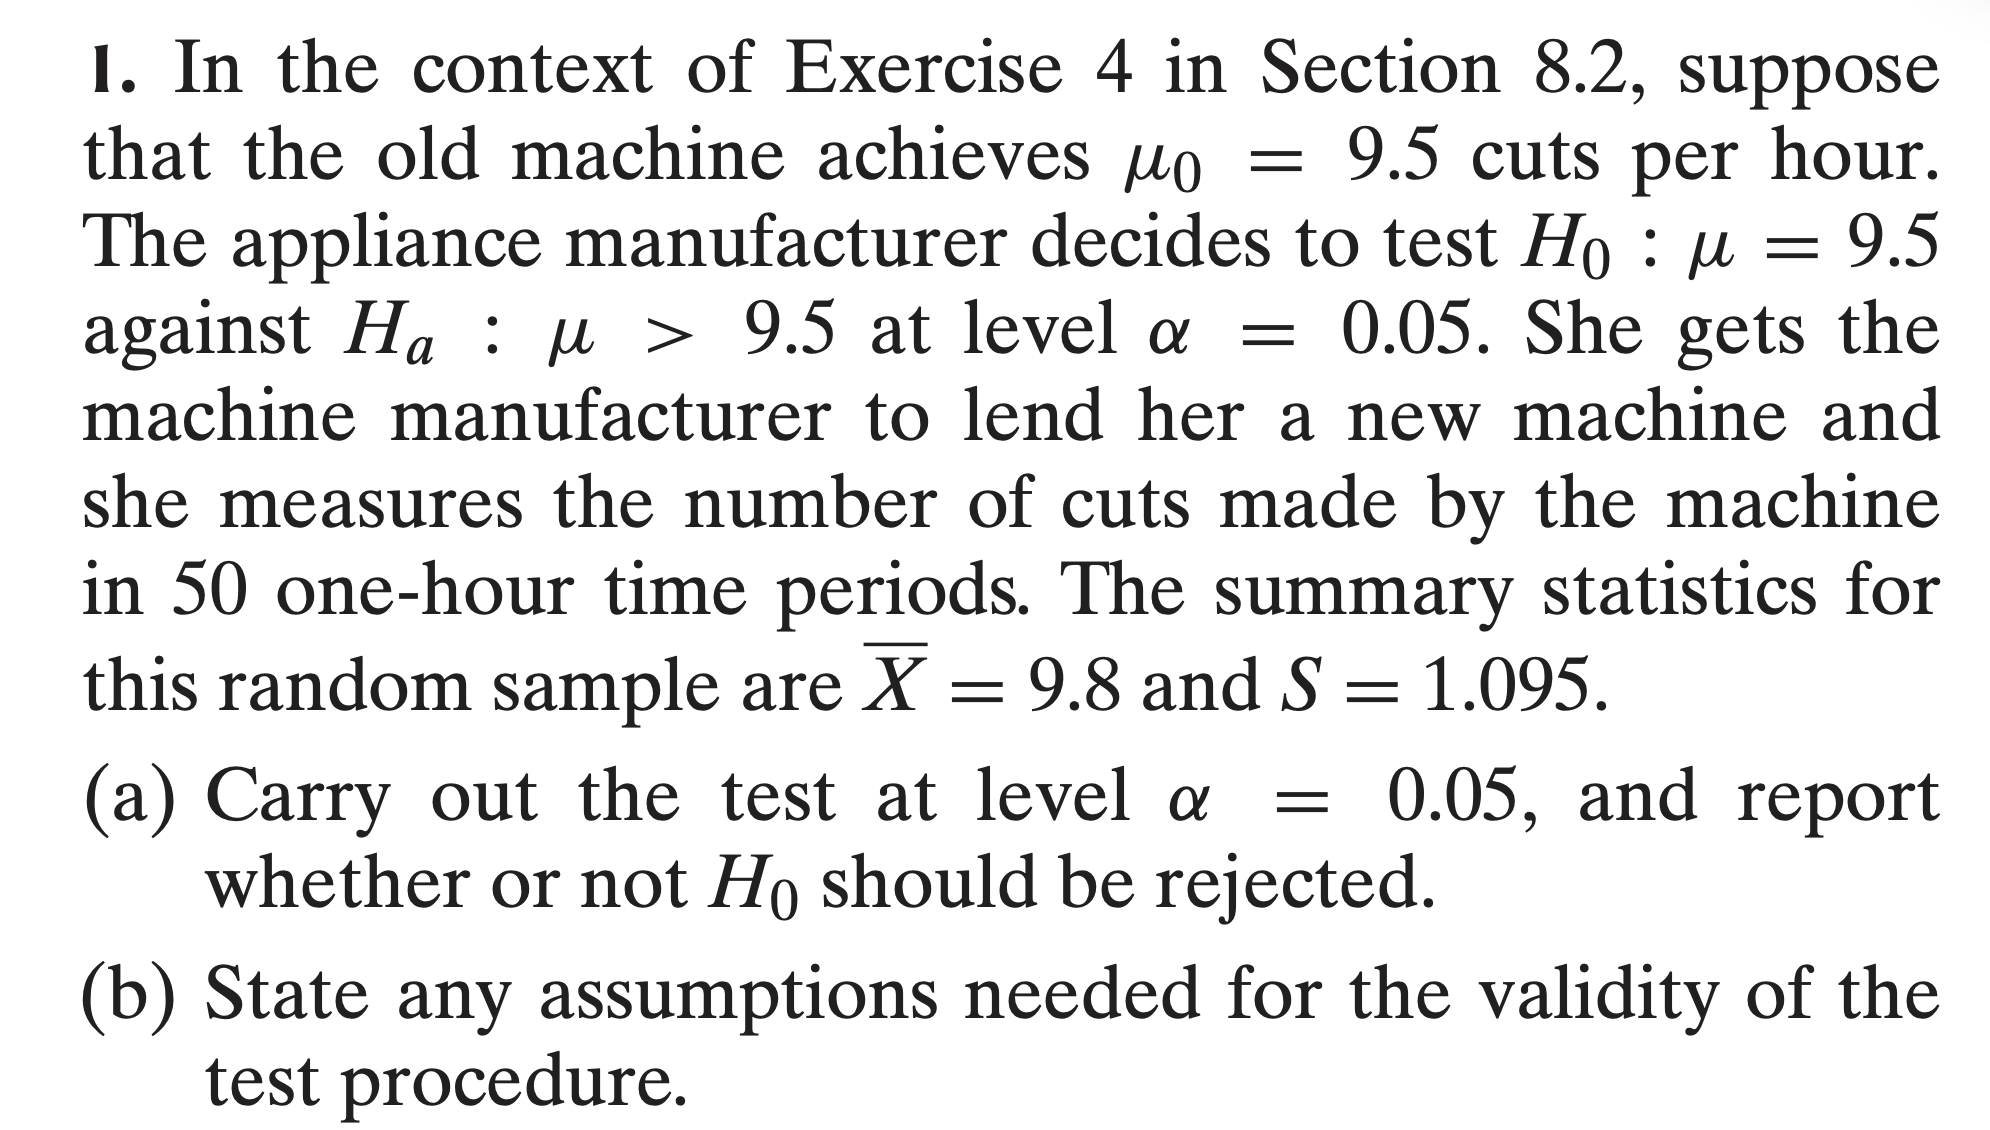

In [ ]:
#test statistic:
T_H0 = (9.8-9.5)/(1.095/(50**0.5))
print('Test statistic',T_H0)
# t_{49,0.05}=?
from scipy.stats import t

# Parameters
df = 49      # Degrees of freedom
alpha = 0.05 # Significance level

# Calculate the critical t-value
t_value = t.ppf(1 - alpha, df)
print(f"t_{df}, {alpha} = {t_value:.4f}")

Test statistic 1.9372788525658884
t_49, 0.05 = 1.6766


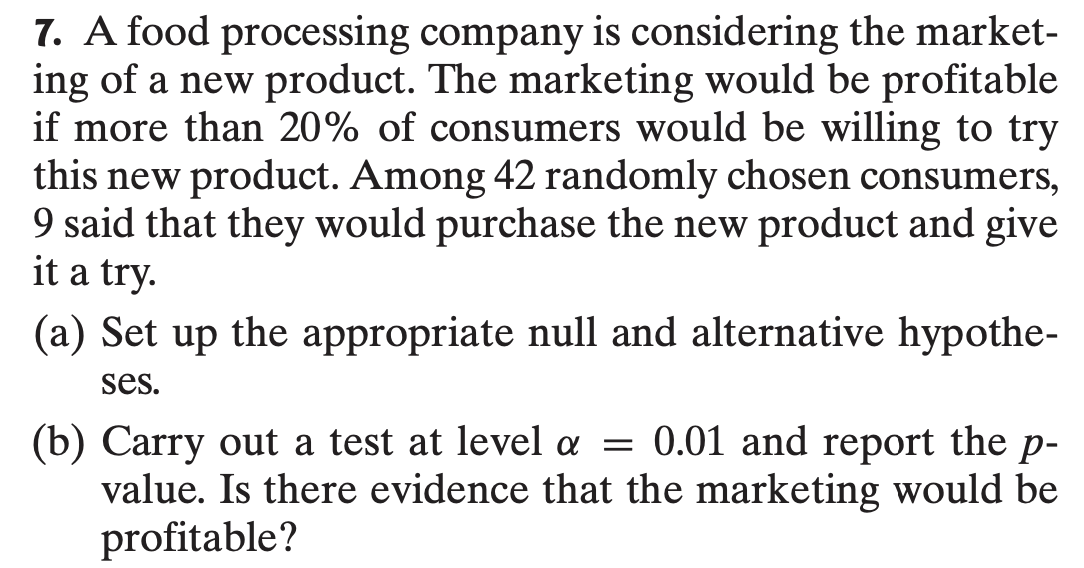

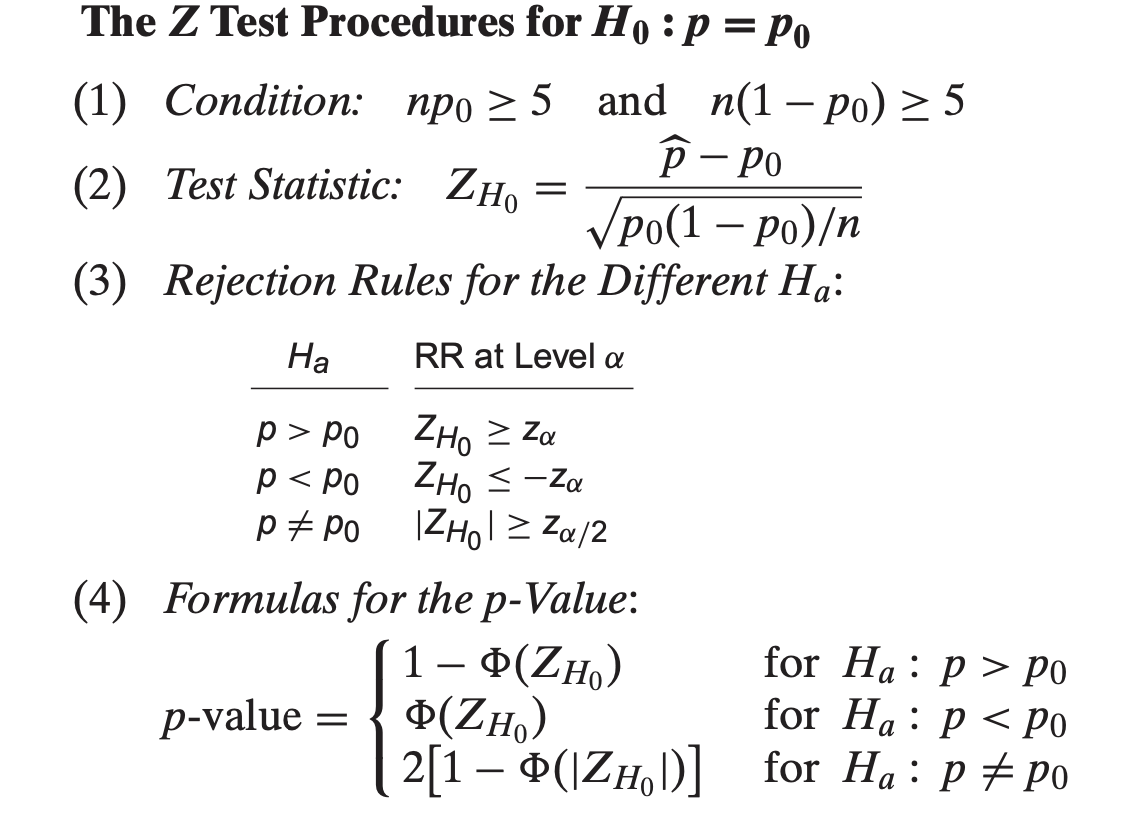

In [ ]:
# # z test for proportion
# Null H0: p = 0.2
# Ha: p > 0.2
#check p*n and q*n > 5?
42*0.2,42*0.8
phat = 9/42

print('proportion',phat)
Z_H0 = (phat - 0.2)/(0.2*0.8/100)**0.5
print('Test statistic:',Z_H0)
#z_alpha alpha = 0.01? p value = 1- Phi(Z_H0)
from scipy.stats import norm

# Compute the CDF at a given point (e.g., x = 0)

cdf_value = norm.cdf(Z_H0)

print(f"Φ({Z_H0}) = {cdf_value:.4f}")  # Φ(x) represents the standard normal CDF
print('p-value', 1- norm.cdf(Z_H0))
print('Since p value is not less than 0.01 we fail to reject')

proportion 0.21428571428571427
Test statistic: 0.35714285714285654
Φ(0.35714285714285654) = 0.6395
p-value 0.3604924309508356
Since p value is not less than 0.01 we fail to reject


# z test for proportion
# assumtion 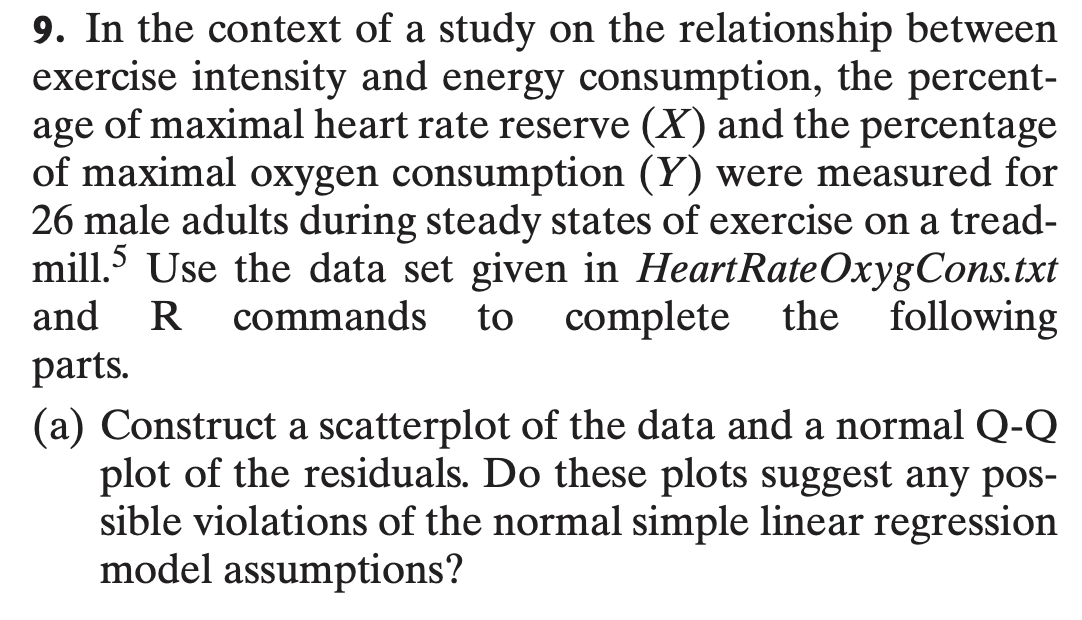

In [ ]:
import pandas as pd

url = "https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/HeartRateOxygCons.txt"
df = pd.read_csv(url, delim_whitespace=True)
df.head()

<ipython-input-22-38debf9d0b8b>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


,HR,Ox
1,66.93,70.41
2,62.21,58.93
3,31.40,28.44
4,31.30,30.37
5,58.74,58.87


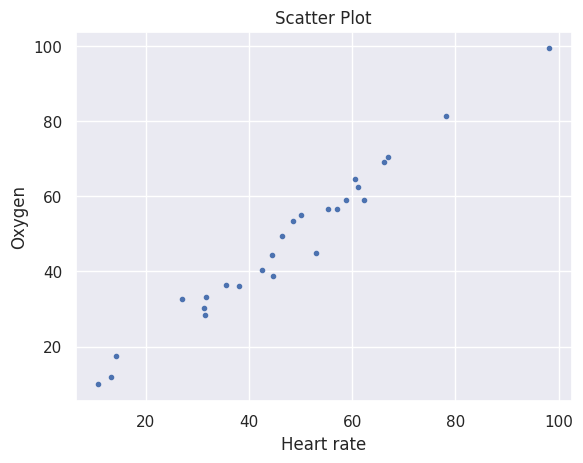

,HR,Ox
HR,1.00000,0.98728
Ox,0.98728,1.00000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

# Example: Generate random data for demonstration
# Replace this with your dataset
X = df['HR']
Y = df['Ox']
# Q-Q Plot
plt.plot(X, Y, '.')
plt.title("Scatter Plot")
plt.xlabel("Heart rate")
plt.ylabel("Oxygen")
plt.show()
df.corr()

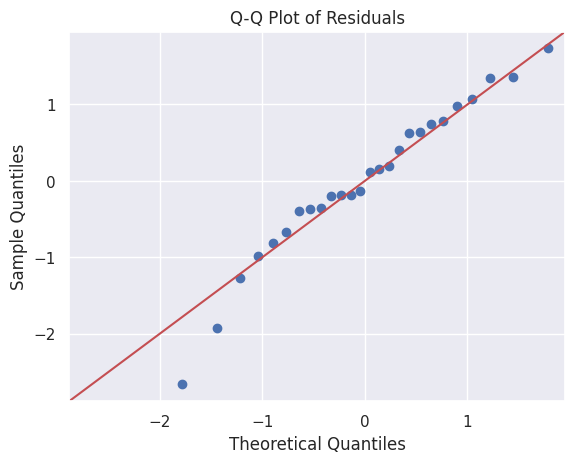

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Add a constant to predictor (for the intercept)
x = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, x).fit()
residuals = model.resid

# Create a Q-Q plot
sm.graphics.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

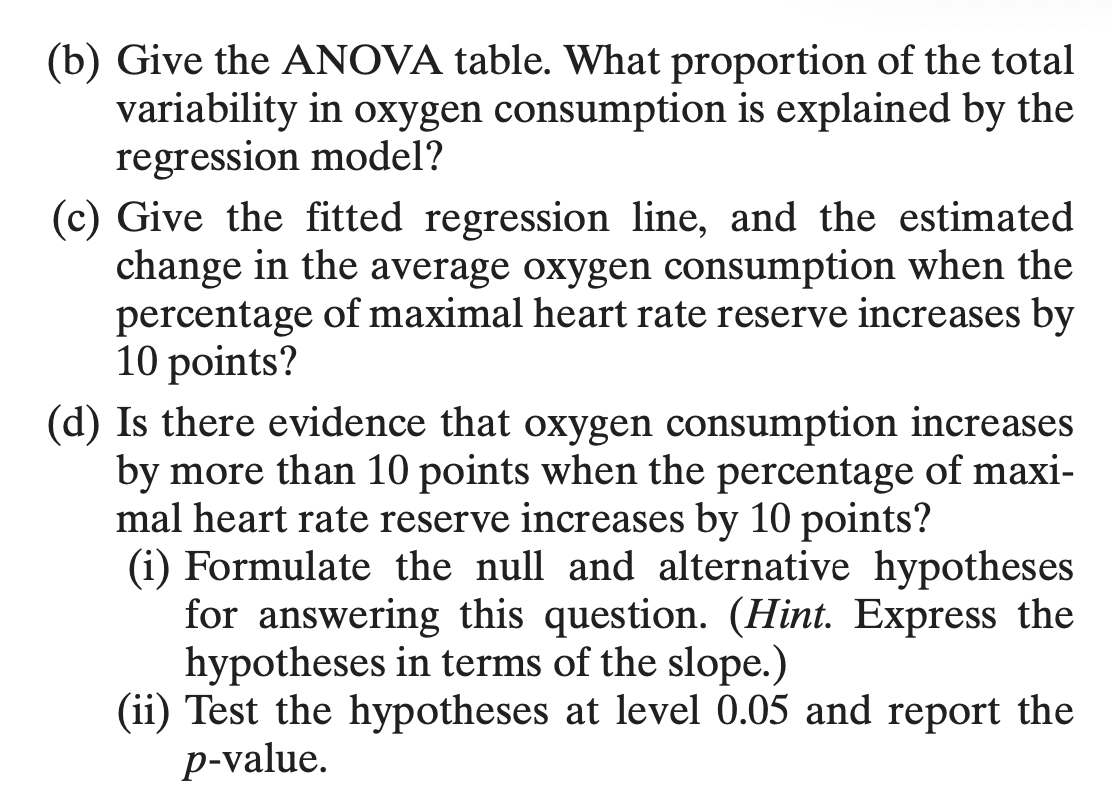

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Ox   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     925.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.11e-20
Time:                        13:39:16   Log-Likelihood:                -67.588
No. Observations:                  26   AIC:                             139.2
Df Residuals:                      24   BIC:                             141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4021      1.716     -0.234      0.8

# Ox = -0.4021 + 1.02* HR

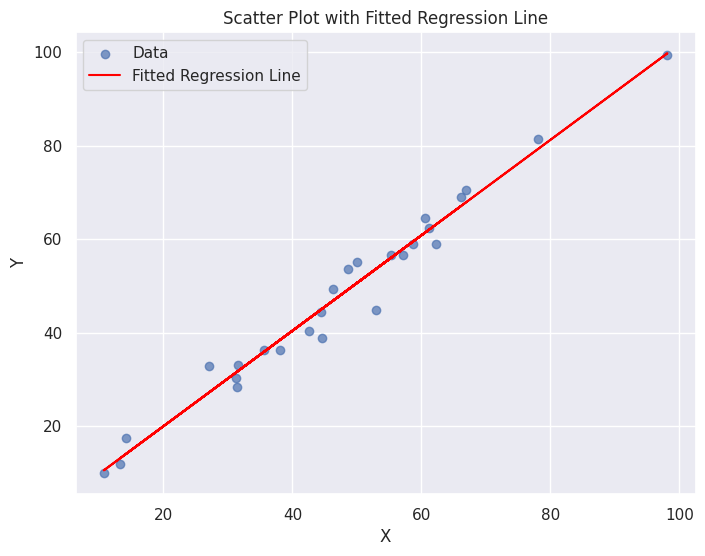

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



# Add a constant to predictor (for the intercept)
x = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, x).fit()

# Predicted values
Y_pred = model.predict(x)

# Plot scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Data", alpha=0.7)
plt.plot(X, Y_pred, color='red', label="Fitted Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Fitted Regression Line")
plt.legend()
plt.show()

# Binomial CDF

In [ ]:
from scipy.stats import binom

# Parameters
n = 20   # Number of trials
p = 0.9  # Probability of success in each trial
k = 16    # Number of successes

# Compute the cumulative probability P(X ≤ k)
binom_cdf = binom.cdf(k, n, p)

print(f"Binomial CDF P(X ≤ {k}) = {binom_cdf}")

Binomial CDF P(X ≤ 16) = 0.13295332343433502


# power of a t test

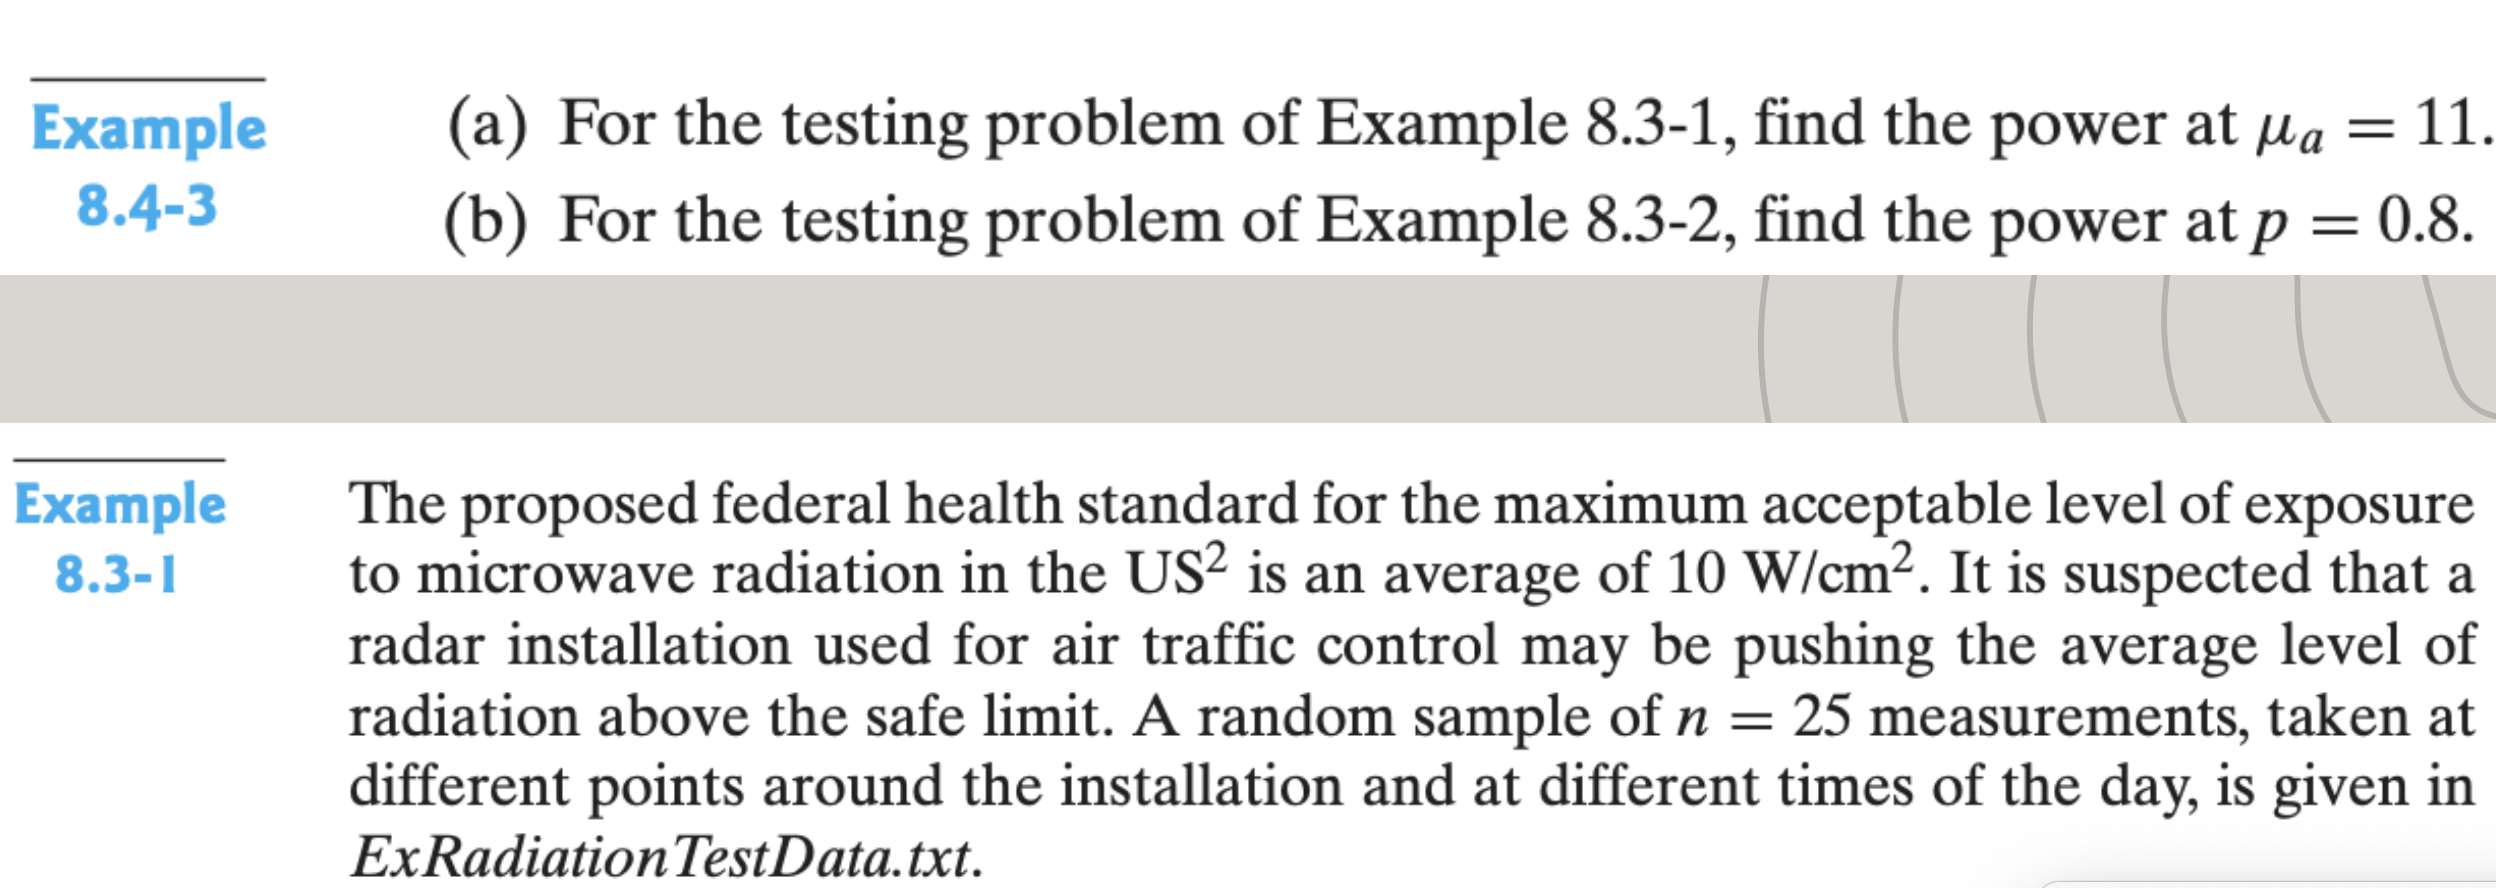

In [ ]:
from statsmodels.stats.power import TTestPower
import numpy as np

# (a) Power calculation for one-sample t-test
n = 25       # Sample size
mu0 = 10      # Null hypothesis mean
mua = 11      # Alternative hypothesis mean
sd = 2        # Standard deviation
alpha1 = 0.05 # Significance level

# Compute effect size
effect_size_t = (mua - mu0) / sd

# Calculate power for one-sample t-test
t_test_power = TTestPower()
power_t = t_test_power.solve_power(effect_size=effect_size_t, nobs=n, alpha=alpha1, alternative='larger')

print(f"Power of the t-test: {power_t:.4f}")  # Expected output ~ 0.78

Power of the t-test: 0.9026


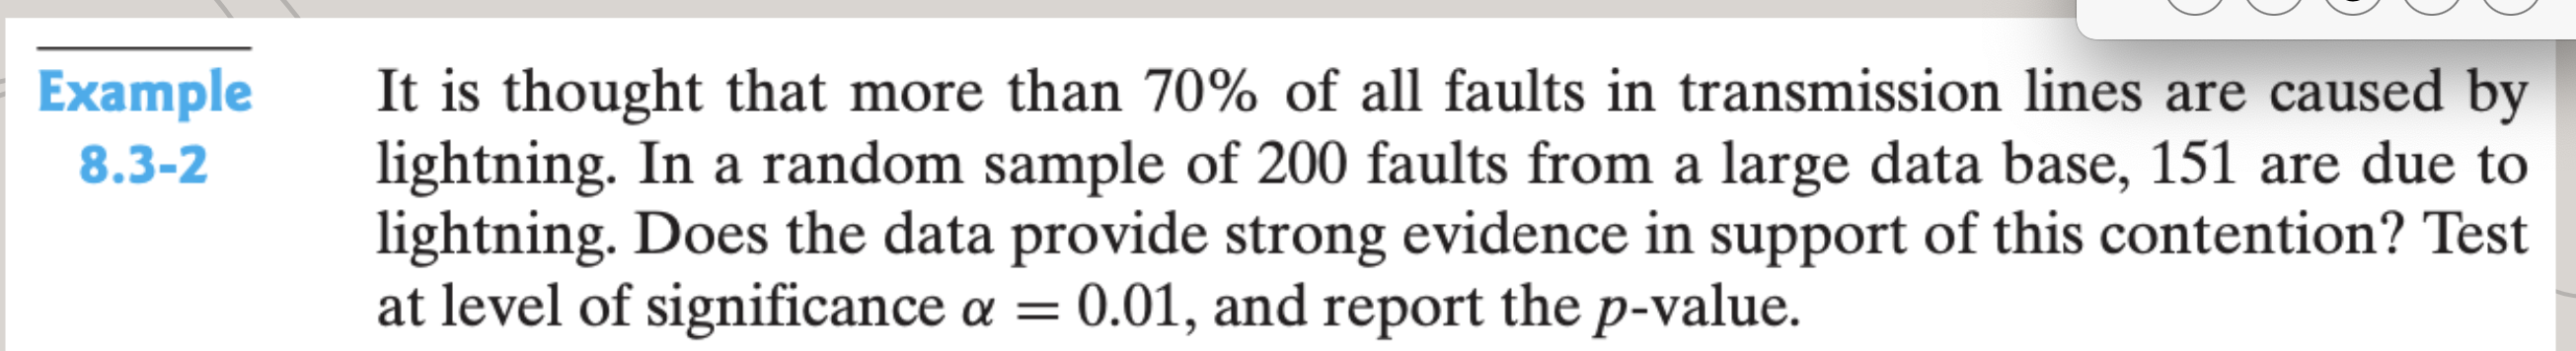

In [ ]:
import math
from scipy.stats import norm

def power_proportion_test(n, p0, pa, alpha=0.05, alternative='two-sided'):
    """
    Calculate the power of a proportion test comparing pa to p0.

    Parameters:
    n (int): Sample size.
    p0 (float): Null hypothesis proportion.
    pa (float): Alternative hypothesis proportion.
    alpha (float, optional): Significance level. Defaults to 0.05.
    alternative (str, optional): Alternative hypothesis, one of 'two-sided', 'greater', 'less'. Defaults to 'two-sided'.

    Returns:
    float: The power of the test.
    """
    # Calculate Cohen's h for proportions
    h = 2 * (math.asin(math.sqrt(pa)) - math.asin(math.sqrt(p0)))
    non_centrality = h * math.sqrt(n)

    if alternative == 'greater':
        z_crit = norm.ppf(1 - alpha)
        power = 1 - norm.cdf(z_crit, loc=non_centrality, scale=1)
    elif alternative == 'less':
        z_crit = norm.ppf(alpha)
        power = norm.cdf(z_crit, loc=non_centrality, scale=1)
    elif alternative == 'two-sided':
        z_crit_low = norm.ppf(alpha / 2)
        z_crit_high = norm.ppf(1 - alpha / 2)
        prob_low = norm.cdf(z_crit_low, loc=non_centrality, scale=1)
        prob_high = 1 - norm.cdf(z_crit_high, loc=non_centrality, scale=1)
        power = prob_low + prob_high
    else:
        raise ValueError("Alternative must be 'two-sided', 'greater', or 'less'")

    return power

# Example usage:
power = power_proportion_test(n=200, p0=0.7, pa=0.8, alpha=0.01, alternative='greater')
print(f"Power: {power:.4f}")

Power: 0.9507


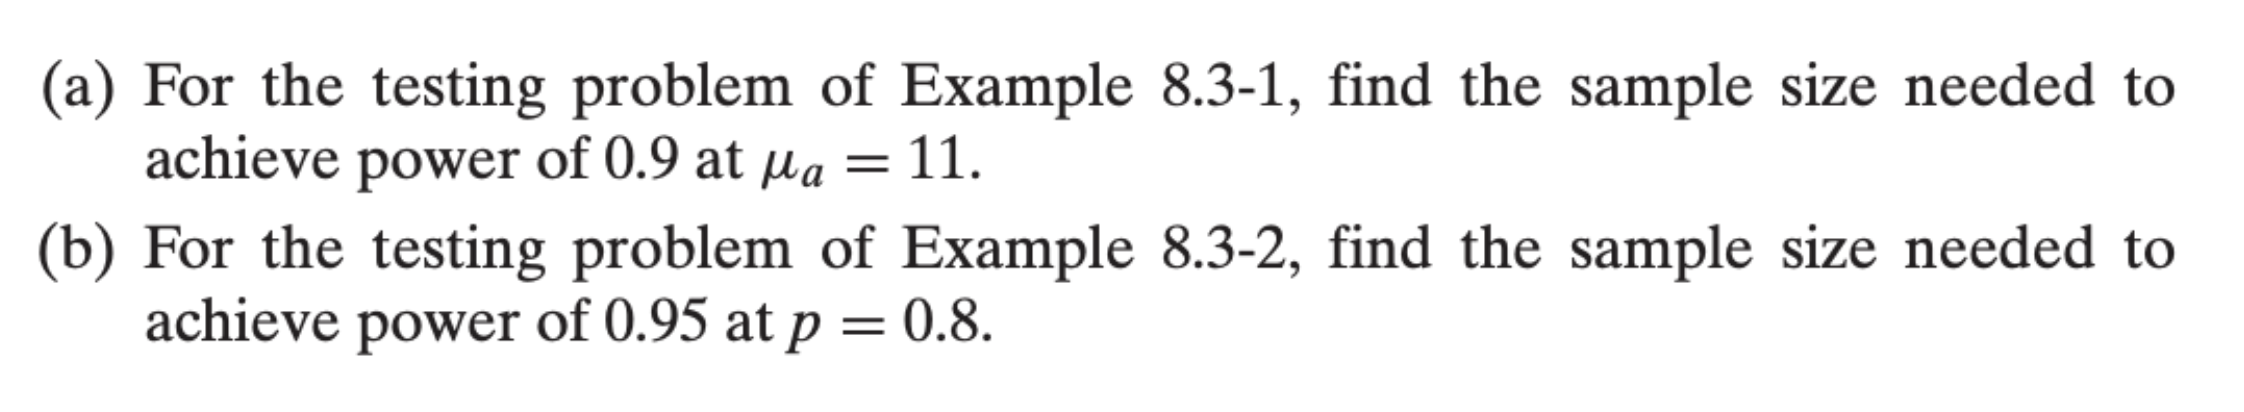

In [ ]:
from statsmodels.stats.power import TTestPower, NormalIndPower
import numpy as np

# (a) Required sample size for one-sample t-test
effect_size_t = (11 - 10) / 2  # Effect size
alpha1 = 0.05  # Significance level
power1 = 0.9   # Desired power

t_test_power = TTestPower()
sample_size_t = t_test_power.solve_power(effect_size=effect_size_t, power=power1, alpha=alpha1, alternative='larger')

print(f"Required sample size for t-test: {np.ceil(sample_size_t):.0f}")  # Expected output ~ 36

Required sample size for t-test: 36


In [ ]:
import math
from scipy.stats import norm

def sample_size_proportion_test(p0, pa, alpha=0.05, power=0.80, alternative='greater'):
    """
    Calculate the required sample size for a proportion test comparing pa to p0 with the desired power.

    Parameters:
    p0 (float): Null hypothesis proportion.
    pa (float): Alternative hypothesis proportion.
    alpha (float, optional): Significance level. Defaults to 0.05.
    power (float, optional): Desired power of the test. Defaults to 0.80.
    alternative (str, optional): Alternative hypothesis, one of 'two-sided', 'greater', 'less'. Defaults to 'greater'.

    Returns:
    int: The required sample size.
    """
    # Calculate Cohen's h for proportions
    h = 2 * (math.asin(math.sqrt(pa)) - math.asin(math.sqrt(p0)))

    # Define critical value for given alpha and alternative hypothesis
    if alternative == 'greater':
        z_crit = norm.ppf(1 - alpha)
    elif alternative == 'less':
        z_crit = norm.ppf(alpha)
    elif alternative == 'two-sided':
        z_crit = norm.ppf(1 - alpha / 2)
    else:
        raise ValueError("Alternative must be 'two-sided', 'greater', or 'less'")

    # Calculate the non-centrality parameter
    z_power = norm.ppf(power)  # Find z-value corresponding to desired power
    n = ( (z_crit + z_power) / h )**2  # Rearranged formula for sample size

    return int(math.ceil(n))  # Round up to ensure enough sample size

# (b) Calculate required sample size for proportion test
p0 = 0.7       # Null hypothesis proportion
pa = 0.8       # Alternative hypothesis proportion
alpha2 = 0.01  # Significance level
power2 = 0.95  # Desired power

# Calculate required sample size
required_sample_size = sample_size_proportion_test(p0=p0, pa=pa, alpha=alpha2, power=power2, alternative='greater')
print(f"Required Sample Size: {required_sample_size}")

Required Sample Size: 294
